In [2]:
# importing the Libraries
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
import torch
from PIL import Image

In [3]:
# Load a VisionEncoderDecoderModel for image captioning from the pretrained "nlpconnect/vit-gpt2-image-captioning" checkpoint.
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

# Instantiate a ViTImageProcessor for image preprocessing from the same pretrained checkpoint.
feature_extractor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

# Instantiate a tokenizer appropriate for the model from the pretrained "nlpconnect/vit-gpt2-image-captioning".
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

# Check if CUDA (GPU) is available and move the model to the appropriate device (GPU if available, else CPU).
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.61k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/241 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_featur

In [5]:
# Parameters for text generation using a transformer-based model.

# Maximum length of generated text
max_length = 20

# Number of beams for beam search decoding
num_beams = 4

# Generation parameters dictionary
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}


In [14]:
def prediction_steps(image_paths):
  images = []
  for image_path in image_paths:
    i_image = Image.open(image_path)
    if i_image.mode != "RGB":
      i_image = i_image.convert(mode="RGB")

    images.append(i_image)


    # Extract pixel values and prepare for model input
    pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
    pixel_values = pixel_values.to(device)

    # Generate text predictions using the model
    output_ids = model.generate(pixel_values, **gen_kwargs)

    # Decode predicted output into readable text format
    predicted_out = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
    predicted_out = [pred.strip() for pred in predicted_out]

    return predicted_out

In [29]:
input_image = prediction_steps(['/content/drive/MyDrive/mandrinktea.jpeg'])

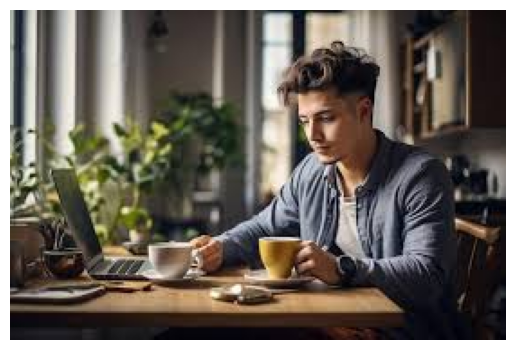

In [30]:
# Display the image
import matplotlib.pyplot as plt
i_image = Image.open('/content/drive/MyDrive/mandrinktea.jpeg')
if i_image.mode != "RGB":
  i_image = i_image.convert(mode="RGB")
plt.imshow(i_image)
plt.axis('off')
plt.show()

In [31]:
input_image

['a man sitting at a table with a cup of coffee']